In [18]:
# -----------------------------------------------------------
# Step 1: Import Necessary Libraries
# -----------------------------------------------------------
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

# -----------------------------------------------------------
# Step 2: Load and Explore the Dataset
# -----------------------------------------------------------

df = pd.read_csv("C://Users/Admin//Downloads//archive (1)//Mall_Customers.csv")

print("\n--- First 5 Rows ---")
print(df.head())

print("\n--- Shape ---")
print(df.shape)

print("\n--- Descriptive Statistics ---")
print(df.describe(include='all'))

print("\n--- Column Names ---")
print(df.columns)

# -----------------------------------------------------------
# Step 3: Preprocess the Data
# -----------------------------------------------------------

# We choose "Genre" as the target column
TARGET_COLUMN = "Genre"

# Encode target (Male/Female → 0/1)
df[TARGET_COLUMN] = df[TARGET_COLUMN].map({'Male': 0, 'Female': 1})

# Drop non-feature column "CustomerID"
X = df.drop(["CustomerID", TARGET_COLUMN], axis=1)
y = df[TARGET_COLUMN]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Standardize numeric features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# -----------------------------------------------------------
# Step 4: Train the KNN Model
# -----------------------------------------------------------

k = 5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

# -----------------------------------------------------------
# Step 5: Make Predictions
# -----------------------------------------------------------

y_pred = knn.predict(X_test)

# -----------------------------------------------------------
# Step 6: Evaluate the Model
# -----------------------------------------------------------

print("\n--- Confusion Matrix ---")
print(confusion_matrix(y_test, y_pred))

print("\n--- Classification Report ---")
print(classification_report(y_test, y_pred))



--- First 5 Rows ---
   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

--- Shape ---
(200, 5)

--- Descriptive Statistics ---
        CustomerID   Genre         Age  Annual Income (k$)  \
count   200.000000     200  200.000000          200.000000   
unique         NaN       2         NaN                 NaN   
top            NaN  Female         NaN                 NaN   
freq           NaN     112         NaN                 NaN   
mean    100.500000     NaN   38.850000           60.560000   
std      57.879185     NaN   13.969007           26.264721   
min       1.000000     NaN   18.000000           15.000000   


Initial cluster centers:
 [[ 0.0750986   1.55350054]
 [ 0.39301974  1.29967675]
 [ 0.71966762 -0.37338272]]
Converged at iteration: 14


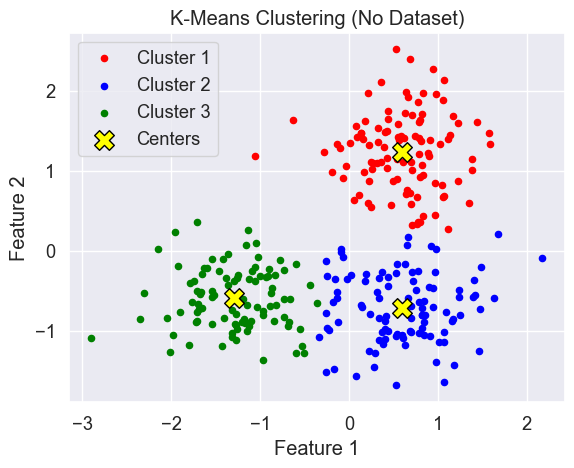

In [19]:
#9b
# ------------------------------------------------------------
# Step 1: Import Necessary Libraries
# ------------------------------------------------------------
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# ------------------------------------------------------------
# Step 2: Load and Preprocess Data (Generate Synthetic Data)
# ------------------------------------------------------------

np.random.seed(42)

# Create synthetic data (3 clusters)
data1 = np.random.randn(100, 2) + np.array([2, 2])
data2 = np.random.randn(100, 2) + np.array([-2, -2])
data3 = np.random.randn(100, 2) + np.array([2, -2])

X = np.vstack((data1, data2, data3))

# Optional: Standardize data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# ------------------------------------------------------------
# Step 3: Initialize Cluster Centers
# ------------------------------------------------------------

K = 3  # number of clusters
n_samples, n_features = X.shape

# Randomly choose K data points as initial cluster centers
indices = np.random.choice(n_samples, K, replace=False)
centers = X[indices]

print("Initial cluster centers:\n", centers)

# ------------------------------------------------------------
# Step 4 & 5: K-Means Algorithm (Assignment + Update)
# ------------------------------------------------------------

def compute_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

# Repeat until convergence
for iteration in range(20):  # fixed iterations or stop when stable
    # Step 4: Assign data points to the nearest cluster center
    clusters = [[] for _ in range(K)]
    labels = np.zeros(n_samples)

    for i, point in enumerate(X):
        distances = np.array([compute_distance(point, center) for center in centers])
        cluster_index = np.argmin(distances)
        clusters[cluster_index].append(point)
        labels[i] = cluster_index

    # Step 5: Update cluster centers
    new_centers = []
    for cluster in clusters:
        if len(cluster) > 0:
            new_centers.append(np.mean(cluster, axis=0))
        else:
            # If a cluster is empty, reinitialize it
            new_centers.append(X[np.random.choice(n_samples)])

    new_centers = np.array(new_centers)

    # Check convergence (centers not changing)
    if np.allclose(centers, new_centers, atol=1e-4):
        print("Converged at iteration:", iteration)
        break

    centers = new_centers

# ------------------------------------------------------------
# Step 6: Plot the Final Clusters
# ------------------------------------------------------------

colors = ['red', 'blue', 'green']

for k in range(K):
    cluster_points = X[labels == k]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], s=20, color=colors[k], label=f"Cluster {k+1}")

# Plot cluster centers
plt.scatter(centers[:, 0], centers[:, 1], s=200, c='yellow', edgecolors='black', marker='X', label="Centers")

plt.title("K-Means Clustering (No Dataset)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()

